## Hotel Booking Demand - Exploratory Data Analysis

### Objectives
The objective is to answer these questions:
- What does the hotel booking market look like?
    - Monthly and yearly booking
    - General Lead Time
    - Average stay time
    - Country of bookings
- What attributes affect booking cancellations?

## Step 1. Load final data

In [1]:
#import libraries
import pandas as pd
pd.set_option('mode.chained_assignment', None)
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import cm
%matplotlib inline
import datetime

In [2]:
#Load data
df = pd.read_csv(r"Hotel_Booking_Demand_Final.csv")
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,999.0,999.0,0,Transient,75.0,0,0,Check-Out,2015-07-02
1,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,999.0,0,Transient,75.0,0,0,Check-Out,2015-07-02
2,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,999.0,0,Transient,98.0,0,1,Check-Out,2015-07-03
3,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,999.0,0,Transient,98.0,0,1,Check-Out,2015-07-03
4,Resort Hotel,0,0,2015,July,27,1,0,2,2,...,No Deposit,999.0,999.0,0,Transient,107.0,0,0,Check-Out,2015-07-03


##  Step 3. Explore data

####  3.1. Hotel Booking Demand Overview

####  3.1.1. Monthly and Yearly Booking

In [3]:
sns.set_palette("Pastel1")

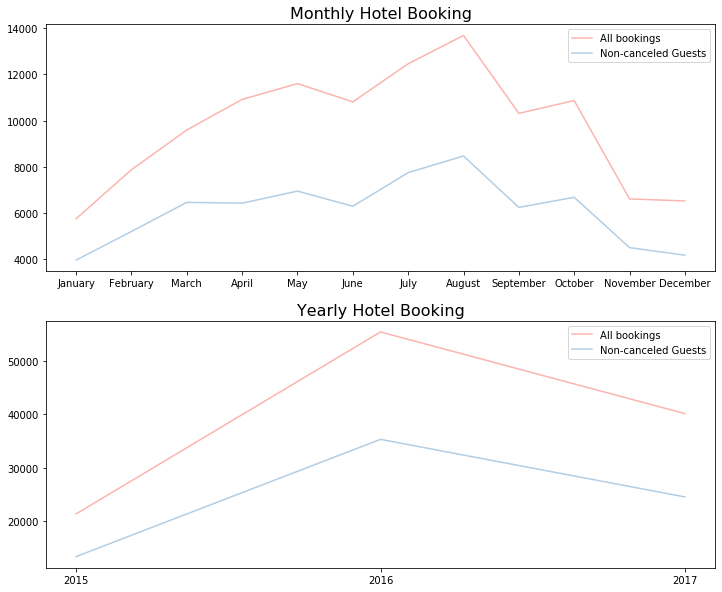

In [4]:
# monthly booking
months = ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]
monthly_booking = pd.Categorical(df["arrival_date_month"], categories=months, ordered=True)
monthly_non_canceled = pd.Categorical(df[df['is_canceled']==0]["arrival_date_month"], categories=months, ordered=True)

#yearly booking
yearly_booking = pd.Categorical(df["arrival_date_year"], categories=df['arrival_date_year'].unique(), ordered=True)
yearly_non_canceled = pd.Categorical(df[df['is_canceled']==0]["arrival_date_year"], categories=df['arrival_date_year'].unique(), ordered=True)

#plot
fig, (ax1,ax2) = plt.subplots(2,figsize =(12,10))
ax1.plot(monthly_booking.value_counts().index, monthly_booking.value_counts())
ax1.plot(monthly_non_canceled.value_counts().index, monthly_non_canceled.value_counts())
ax1.legend(['All bookings','Non-canceled Guests'])
ax1.set_title("Monthly Hotel Booking",fontsize=16)

ax2.plot(yearly_booking.value_counts().index, yearly_booking.value_counts())
ax2.plot(yearly_non_canceled.value_counts().index, yearly_non_canceled.value_counts())
ax2.legend(['All bookings','Non-canceled Guests'])
ax2.set_title("Yearly Hotel Booking",fontsize=16)
ax2.xaxis.set_ticks(df['arrival_date_year'].unique())

plt.show()

- Most busy season of the year was in Autumn (July, August). The total bookings decreased significantly in winter, and started to rise again in March. Base on this information, hotels can create different promotions suitable for different time of the year. 
- 2017 witnessed a drop in the total number of bookings.
- Non-canceled guests trend also followed the trend of the total number of bookings.

####  3.1.2. General lead time

Text(85.2, 46167.03, 'Median:71.0')

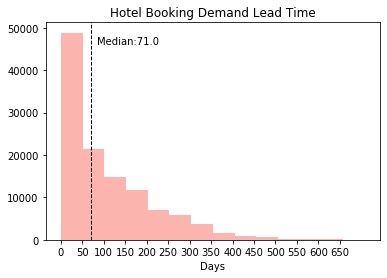

In [5]:
#lead time histogram
g = df['lead_time'].hist(bins = 14, grid=False)
g.set_xticks(range(0,700,50))
g.set_title("Hotel Booking Demand Lead Time")
g.set_xlabel("Days")

#median lead time
min_ylim, max_ylim = plt.ylim()
plt.axvline(df['lead_time'].median(), color='k', linestyle='dashed', linewidth=1)
plt.text(df['lead_time'].median()*1.2,max_ylim*0.9,'Median:{:.1f}'.format(df['lead_time'].median()))

- Most guests made a reservation 50 days before their arrivals.
- Since this is a right-skewed distribution, we use median to calculate the average leadtime. 

####  3.1.3. Average stay time

Text(3.3000000000000003, 44812.845, 'Median:3.0')

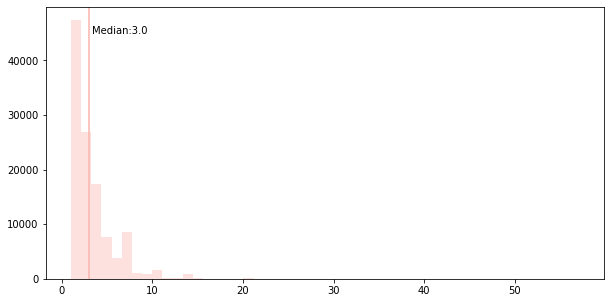

In [6]:
#number of days each guest stayed/ booked to stay
stay_days = df['stays_in_week_nights']+df['stays_in_weekend_nights']

#plot stay days histogram
plt.figure(figsize=(10,5))
sns.distplot(stay_days,kde=False)

#plot median stay days
min_ylim,max_ylim = plt.ylim()
plt.axvline(stay_days.median())
plt.text(stay_days.median()*1.1,max_ylim*0.9, 'Median:{:.1f}'.format(stay_days.median()))

- The majority of guests stayed under 10 days, with 1 being the most popular stay day. 
- Since this is a right-skewed distribution, we use median to calculate the average stay days. On average, guests stayed at hotels for 3 days. 

####  3.1.4. Country of bookings

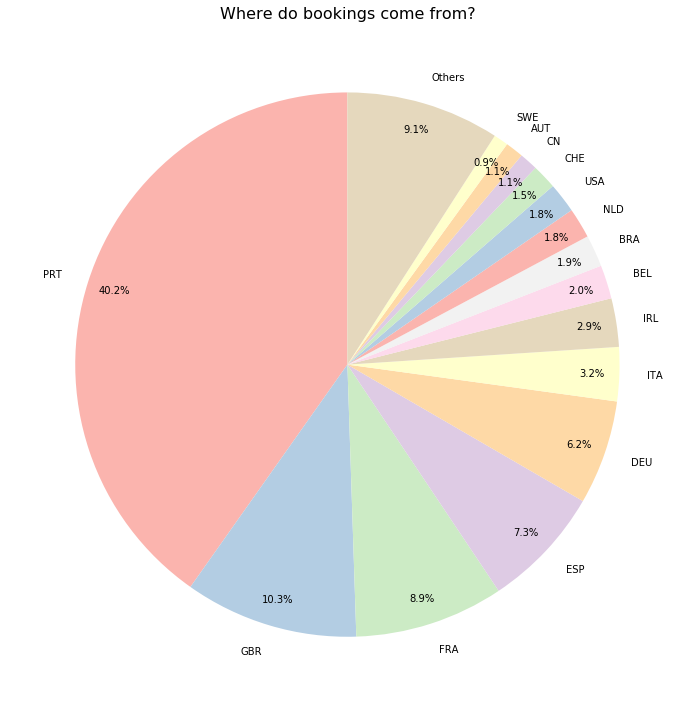

In [7]:
# Where do all bookings come from? show top 15 countries
bookings_per_country = (df.country.value_counts())/len(df) *100
bookings_per_country = bookings_per_country.to_frame().reset_index()
bookings_per_country.columns =['country','percentage']
bookings_per_country.loc[len(bookings_per_country)] = bookings_per_country['percentage'].iloc[15:,].sum()
bookings_per_country.drop(bookings_per_country.index[15:-1],inplace=True)
bookings_per_country['country'].iloc[-1] = 'Others'

#plot pie chart
fig,ax = plt.subplots(figsize=(10,10))
plt.pie(bookings_per_country['percentage'], startangle=90, autopct='%1.1f%%', labels = bookings_per_country['country'],pctdistance=0.9)
plt.title("Where do bookings come from?", fontsize = 16)
plt.tight_layout()
plt.show()

- Portugal accounted for the highest proportion of all bookings (over 40%), which was four times higher than the second place (Great Britain).
- Top countries were mostly from Europe. The only exemption were Brazil, USA, China and Australia.

####  3.2. What attributes affect cancellations?

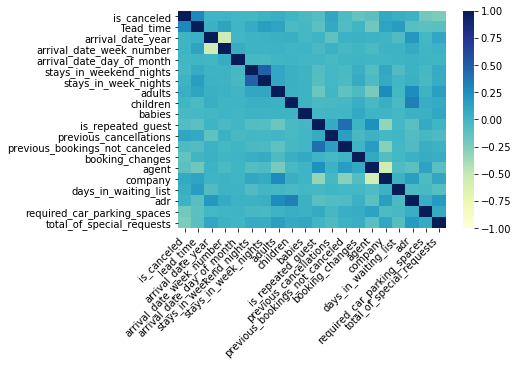

In [8]:
corr = df.corr()
g = sns.heatmap(corr,
                vmin=-1,vmax=1,center=0,
               cmap="YlGnBu")
g = g.set_xticklabels(g.get_xticklabels(), rotation = 45, horizontalalignment='right')

In [9]:
corr['is_canceled'].sort_values()

total_of_special_requests        -0.238318
required_car_parking_spaces      -0.196782
booking_changes                  -0.145136
agent                            -0.113643
is_repeated_guest                -0.074938
previous_bookings_not_canceled   -0.052884
babies                           -0.032491
stays_in_weekend_nights          -0.008026
arrival_date_day_of_month        -0.006375
children                          0.004118
arrival_date_week_number          0.008925
arrival_date_year                 0.013824
stays_in_week_nights              0.017780
adr                               0.028869
days_in_waiting_list              0.053937
adults                            0.054556
company                           0.092846
previous_cancellations            0.110446
lead_time                         0.289258
is_canceled                       1.000000
Name: is_canceled, dtype: float64

All independent variables have weak correlation with the dependent variable (is_canceled) with just under 0.3.

####  3.3. Attributes of non-canceled guests

#### 3.3.1. Where does non-canceled guests come from?

In [10]:
# Where do non-canceled guests come from? show top 15 countries
non_canceled = df[df.is_canceled==0]
total_guests = len(non_canceled)
guest_per_country = (non_canceled.country.value_counts())/total_guests *100
guest_per_country = guest_per_country.to_frame().reset_index()
guest_per_country.columns =['country','percentage']
guest_per_country.loc[len(guest_per_country)] = guest_per_country['percentage'].iloc[15:,].sum()
guest_per_country.drop(guest_per_country.index[15:-1],inplace=True)
guest_per_country['country'].iloc[-1] = 'Others'
guest_per_country

,country,percentage
0,PRT,26.992932
1,GBR,13.154723
2,FRA,11.543940
3,ESP,8.646998
4,DEU,8.256629
5,IRL,3.474962
6,ITA,3.310596
7,BEL,2.550405
8,NLD,2.346318
9,USA,2.172365


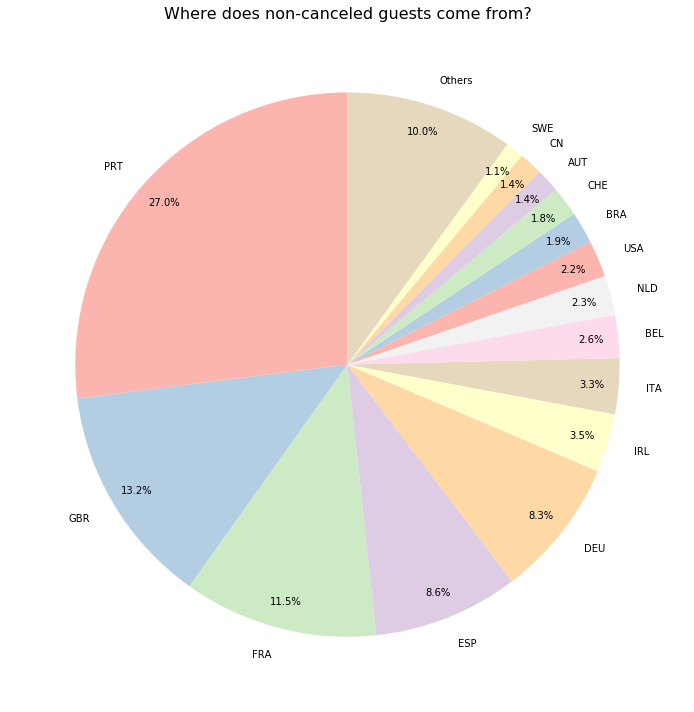

In [11]:
fig,ax = plt.subplots(figsize=(10,10))
plt.pie(guest_per_country['percentage'], startangle=90, autopct='%1.1f%%', labels = guest_per_country['country'],pctdistance=0.9)
plt.title("Where does non-canceled guests come from?", fontsize = 16)
plt.tight_layout()
plt.show()

#### 3.3.2. Are non-canceled guests repeated guests?

Text(0.5, 6.79999999999999, 'Repeated')

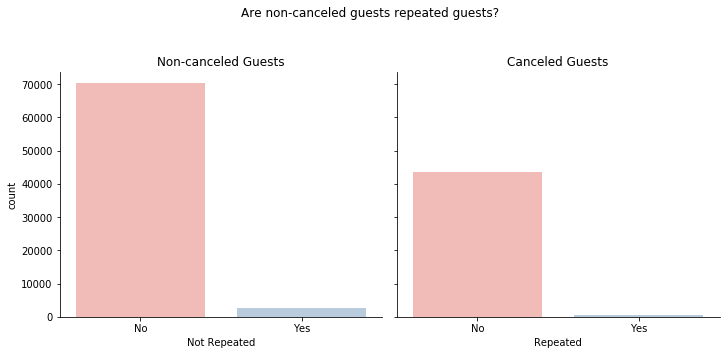

In [12]:
#is_canceled vs. is_repeated_guest
g = sns.catplot(x='is_repeated_guest',data=df,kind='count',col='is_canceled')

g.set_xticklabels(["No","Yes"])
plt.subplots_adjust(top=0.8)
g.fig.suptitle("Are non-canceled guests repeated guests?")

axes=g.axes.flatten()
axes[0].set_title("Non-canceled Guests")
axes[0].set_xlabel("Not Repeated")
axes[1].set_title("Canceled Guests")
axes[1].set_xlabel("Repeated")

####  3.4. Resort Hotel vs. City Hotel

####  3.4.1. Total bookings between Resort Hotel vs. City Hotel

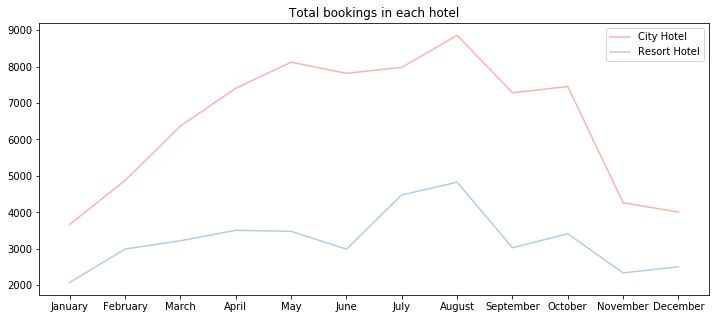

In [13]:
#TOTAL BOOKINGS IN EACH HOTEL
resort = df[df.hotel=='Resort Hotel']
city = df[df.hotel=='City Hotel']
months = ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]
monthly_booking_resort = pd.Categorical(resort['arrival_date_month'], categories=months, ordered=True)
monthly_booking_city = pd.Categorical(city['arrival_date_month'], categories=months, ordered=True)

#plot
plt.figure(figsize=(12,5))
plt.plot(months,monthly_booking_city.value_counts(),label = "City Hotel")
plt.plot(months,monthly_booking_resort.value_counts(),label = 'Resort Hotel')
plt.title("Total bookings in each hotel")
plt.legend()

- The booking trend also followed the total booking trend shown above.
- City Hotel had double the number of bookings than Resort Hotel

####  3.4.2. Monthly average price per non-canceled guest by hotel

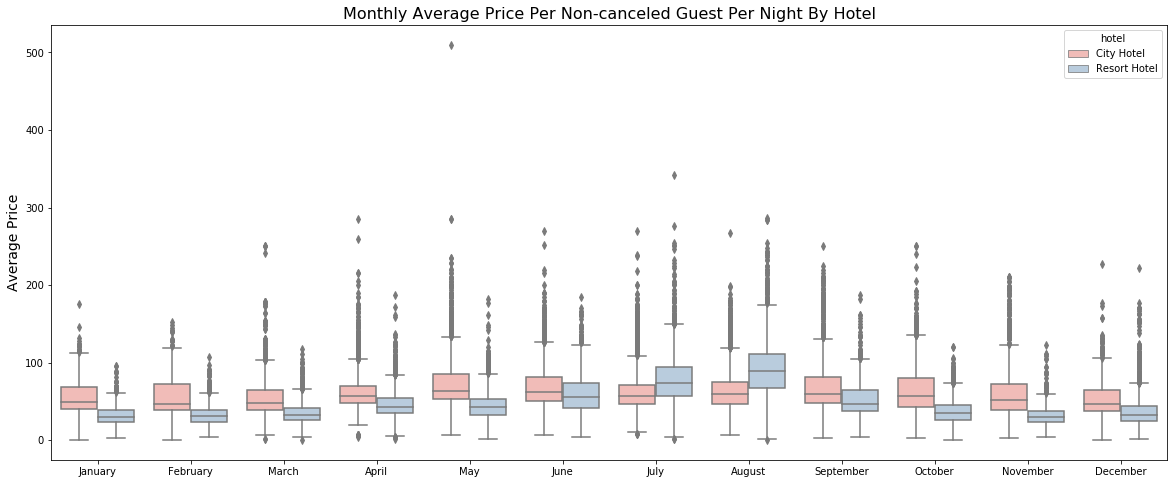

In [14]:
#MONTHLY AVERAGE PRICE PER non-canceled guest PER NIGHT BY HOTEL

#average price per people (babies do not count)
df['adr_pp'] = df['adr']/df['adults']+df['children']
adr_pp_hotel_monthly = df[df.is_canceled==0][['hotel','arrival_date_month','adr_pp']].sort_values('arrival_date_month')

#order by month
months = ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]
adr_pp_hotel_monthly["arrival_date_month"] = pd.Categorical(adr_pp_hotel_monthly["arrival_date_month"], categories=months, ordered=True)
adr_pp_hotel_monthly["hotel"] = pd.Categorical(adr_pp_hotel_monthly["hotel"], categories=['City Hotel','Resort Hotel'], ordered=True)

#box plot
plt.figure(figsize = (20,8))
sns.boxplot(x = "arrival_date_month", y="adr_pp", hue="hotel", data=adr_pp_hotel_monthly)
plt.title("Monthly Average Price Per Non-canceled Guest Per Night By Hotel", fontsize=16)
plt.xlabel('')
plt.ylabel("Average Price", fontsize = 14)
plt.show()

- Overall, City Hotel had higher average price than Resort Hotel. However, in July and August, Resort Hotel's price was higher. 
- City Hotel's price seemed to hold steady through out the year. Meanwhile, Resort Hotel saw a fluctuation in price, with July and August's price being double the rest.

####  3.4.3. Average price per non-canceled guest by hotel and room type

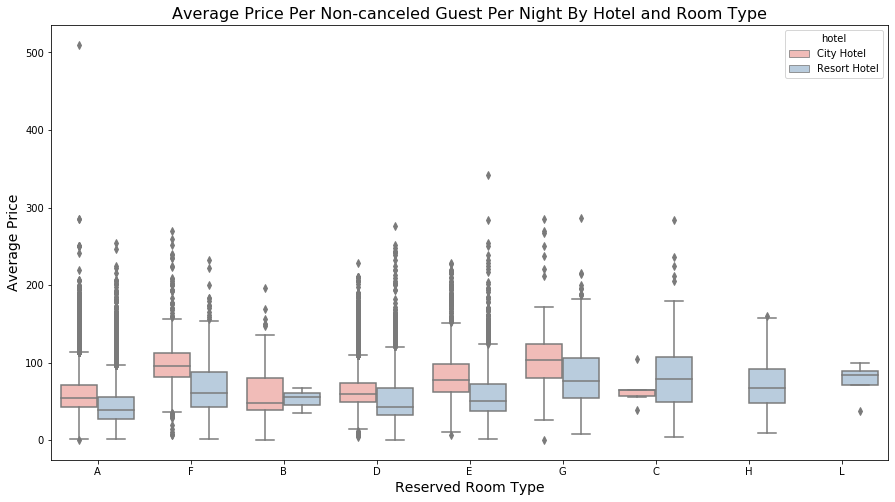

In [15]:
#average price by hotel and room type
adr_pp_hotel_room = df[df.is_canceled==0][['hotel','reserved_room_type','adr_pp']].sort_values('hotel')
adr_pp_hotel_room

#box plot
plt.figure(figsize=(15,8))
sns.boxplot(data = adr_pp_hotel_room,
           x = "reserved_room_type",
           y = "adr_pp",
           hue = 'hotel')
plt.title("Average Price Per Non-canceled Guest Per Night By Hotel and Room Type", fontsize = 16)
plt.xlabel("Reserved Room Type", fontsize = 14)
plt.ylabel("Average Price", fontsize = 14)
plt.show()

#### 3.4.4. How long do people stay at the hotels?

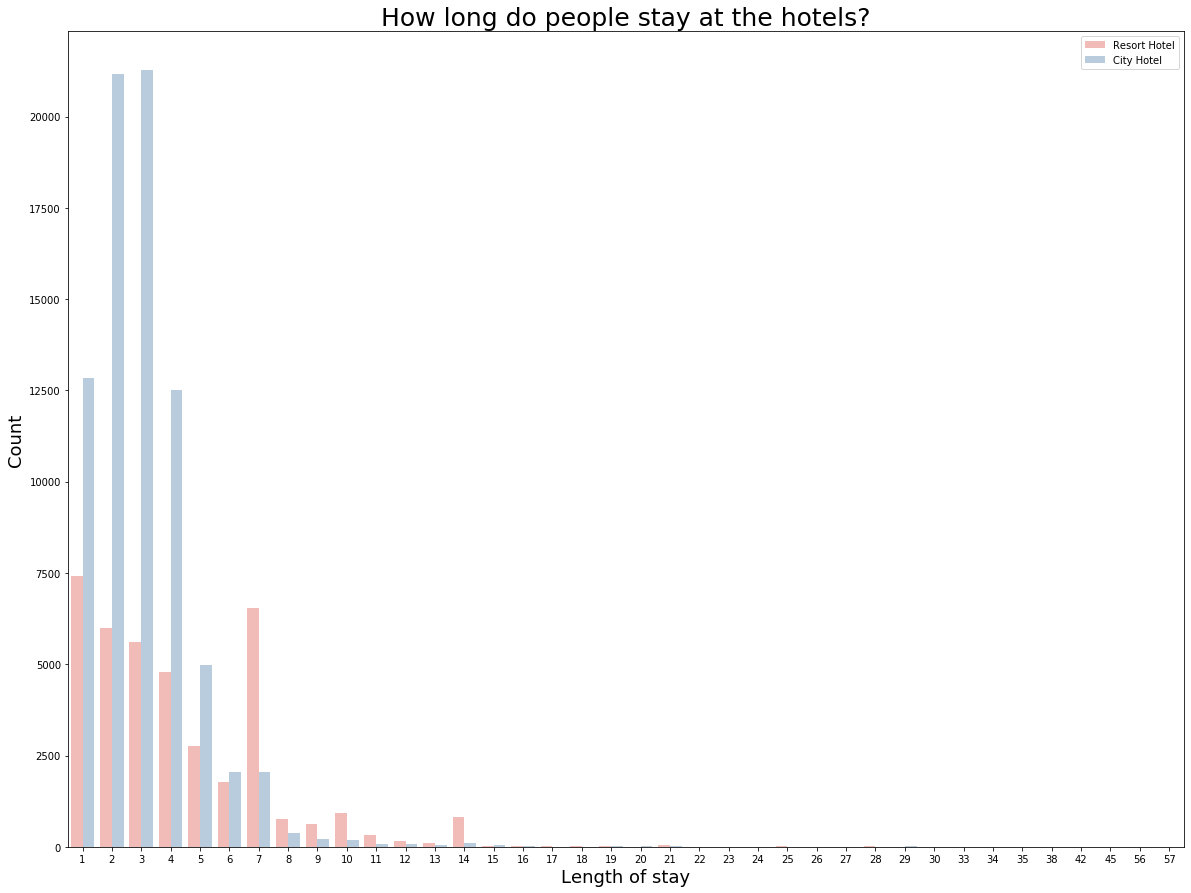

In [16]:
df['length_of_stay'] = df['stays_in_weekend_nights'] + df['stays_in_week_nights']

plt.figure(figsize=(20,15))
g = sns.countplot(x='length_of_stay',hue='hotel',data=df)
title = g.set_title(label='How long do people stay at the hotels?',fontsize=25)
g.set_xlabel("Length of stay",fontsize=18)
g.set_ylabel("Count",fontsize=18)
legend = g.legend(loc='upper right')